In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh
import matplotlib.pyplot as plt
import os, sys, pathlib
import numpy as np
import xarray as xr
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))
sys.path.append(os.path.join(r'/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions/source_functions.py'))

from convergence_functions import *
from plotting_functions import *
from source_functions import *

from matplotlib.ticker import LogFormatter

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2




In [2]:
SNB_50 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_and_density/SNB/case_01')
SNB_100 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/100%_fluence/power_and_density/SNB/case_01')
SNB_150 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/150%_fluence/power_and_density/SNB/case_01')
SNB_200 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/200%_fluence/power_and_density/SNB/case_01')
SNB_250 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/250%_fluence/power_and_density/SNB/case_01')
SNB_300 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/300%_fluence/power_and_density/SNB/case_01')

In [3]:
import numpy as np

def detachment_front_position(ds):
    """
    Calculate the detachment front position for each time step in the dataset.

    Parameters:
    ds (xarray.Dataset): The dataset containing 'Ne', 'Nd', 't', and 'y'.

    Returns:
    tuple: A tuple containing:
        - front_positions (np.ndarray): Detachment front positions for each time step.
        - front_indices (np.ndarray): Indices of the detachment front for each time step.
    """
    # Extract variables
    t = ds['t'].values
    # t -= t[0]  # Normalize time to start from 0
    # t *= 1e3  # Convert to milliseconds
    Ne = np.squeeze(ds['Ne'].values)  # Ensure correct dimensions
    Nd = np.squeeze(ds['Nd'].values)
    y = ds['y'].values[1:-1]  # Exclude guard cells

    # Initialize an array to store detachment front indices
    front_indices = np.zeros(len(t), dtype=int)  # Use int for indices


    # Loop over each time step and find the index where Nd > Ne
    for i in range(len(t)):
        detachment_mask = Nd[i, :] > Ne[i, :]  # Create mask for Nd > Ne
        if np.any(detachment_mask):  # Check if any value satisfies the condition
            front_indices[i] = np.argmax(detachment_mask)  # Find the first index
        else:
            front_indices[i] = -1  # Set to -1 if no detachment is found

    # Calculate detachment front positions relative to y[-1]
    front_positions = np.where(front_indices >= 0, y[-1] - y[front_indices], np.nan)

    return front_positions, front_indices


In [4]:
det_50 = detachment_front_position(SNB_50)
det_100 = detachment_front_position(SNB_100)
det_150 = detachment_front_position(SNB_150)
det_200 = detachment_front_position(SNB_200)
det_250 = detachment_front_position(SNB_250)
det_300 = detachment_front_position(SNB_300)



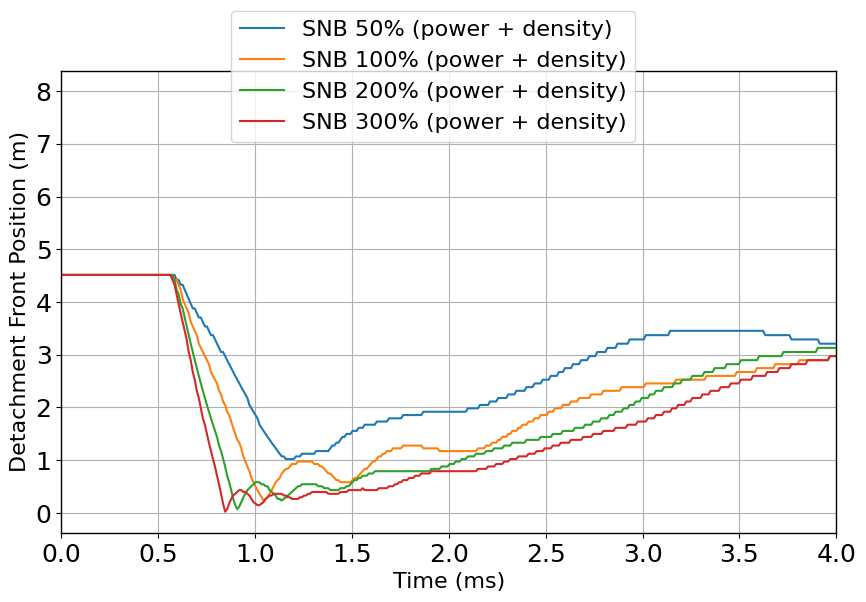

In [5]:
time = SNB_50['t'].values
time -= time[0]  # Normalize time to start from 0
time_milli = time * 1e3

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax.plot(time_milli, det_50[0], label=f"SNB 50% (power + density)")
ax.plot(time_milli, det_100[0], label=f"SNB 100% (power + density)")
# ax.plot(time_milli, det_150[0], label="FL 150% (power + density)")
ax.plot(time_milli, det_200[0], label=f"SNB 200% (power + density)")
# ax.plot(time_milli[:len(det_200[0])], det_200[0], label="FL 200% (power + density)", color = 'red')
# ax.plot(time_milli, det_250[0], label="FL 250% (power + density)")
ax.plot(time_milli, det_300[0], label=f"SNB 300% (power + density)")
ax.set_xbound(0, 4)
# ax.set_xscale('log')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Detachment Front Position (m)")

fig.legend(loc = 'upper center')

In [6]:
FL_power_only_50 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_only/FL/case_01')
FL_power_only_100 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/100%_fluence/power_only/FL/case_01')
FL_power_only_150 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/150%_fluence/power_only/FL/case_01')
FL_power_only_200 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/200%_fluence/power_only/FL/case_01')
FL_power_only_250 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/250%_fluence/power_only/FL/case_01')
FL_power_only_300 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/300%_fluence/power_only/FL/case_01')

In [7]:
det_300_FL = detachment_front_position(FL_power_only_300)

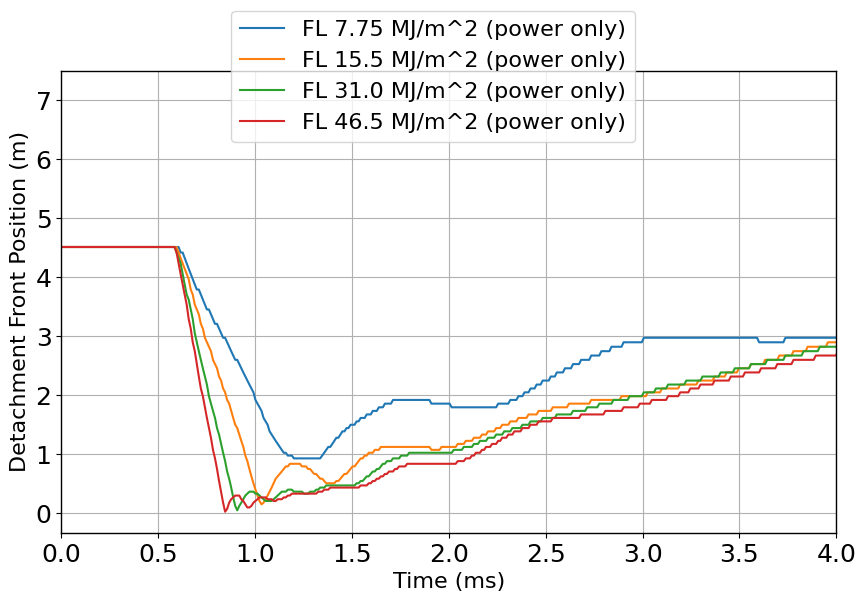

In [16]:
data_set = {f'FL {15.5 * 0.5} MJ/m^2 (power only)' : FL_power_only_50, f'FL {15.5 * 1} MJ/m^2 (power only)': FL_power_only_100, f'FL {15.5 * 2} MJ/m^2 (power only)': FL_power_only_200,
             f'FL {15.5 * 3} MJ/m^2 (power only)': FL_power_only_300}
fig,ax = plt.subplots(1,1 , figsize=(10, 6))
for key, value in data_set.items():
    if key != f'FL {15.5 * 2.5} MJ/m^2 (power only)' or key !=  f'FL {15.5 * 1.5} MJ/m^2 (power only)':
        det = detachment_front_position(value)
        time = value['t'].values
        time -= time[0]  # Normalize time to start from 0
        time_milli = time * 1e3

    
        ax.plot(time_milli, det[0], label=f"{key}")
ax.set_xbound(0, 5)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Detachment Front Position (m)")
fig.legend(loc = 'upper center')

# time = FL_power_only_300['t'].values

# time -= time[0]  # Normalize time to start from 0
# time_milli = time * 1e3

# fig,ax = plt.subplots(1,1 , figsize=(10, 6))
# ax.plot(time_milli, det_300_FL[0], label=f"FL 300% (power only)")